<a href="https://colab.research.google.com/github/anupbagale/Image_Processing/blob/main/Histogram_equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image_path= "/content/drive/MyDrive/image_processing_lab/leena_img.png"

In [8]:
def histogram_equalization(image):
  histogram, bins= np.histogram(image.flatten(), 256, [0, 256]) # Compute the histogram of the flattened image
  cdf=histogram.cumsum() # Compute the cumulative distribution function (CDF) from the histogram
  cdf_normalized= cdf/cdf.max() # Normalize the CDF to scale between 0 and 1
  equalized_image= np.interp(image.flatten(), bins[:-1], cdf_normalized*255).reshape(image.shape)  # Map the pixel values in the original image to the equalized CDF
  return equalized_image.astype(np.uint8),histogram  # Return the equalized image (as uint8) and the original histogram

In [5]:
image= cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
equalized_image, histogram= histogram_equalization(image)

In [6]:
equalized_histogram, _ = np.histogram(equalized_image.flatten(), bins=256, range=(0, 256)) # Compute the histogram of the equalized im

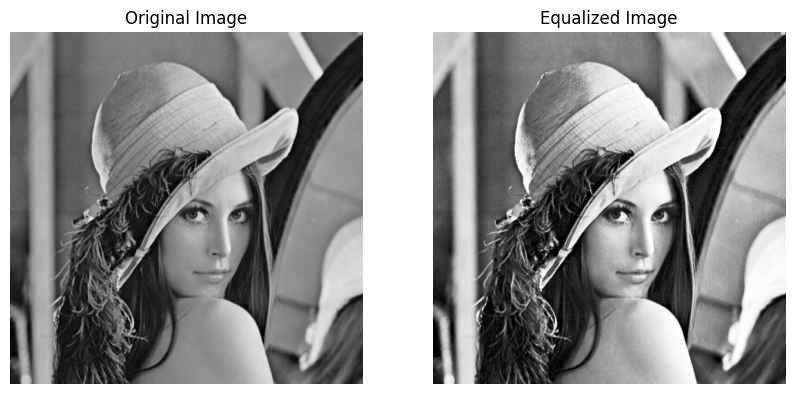

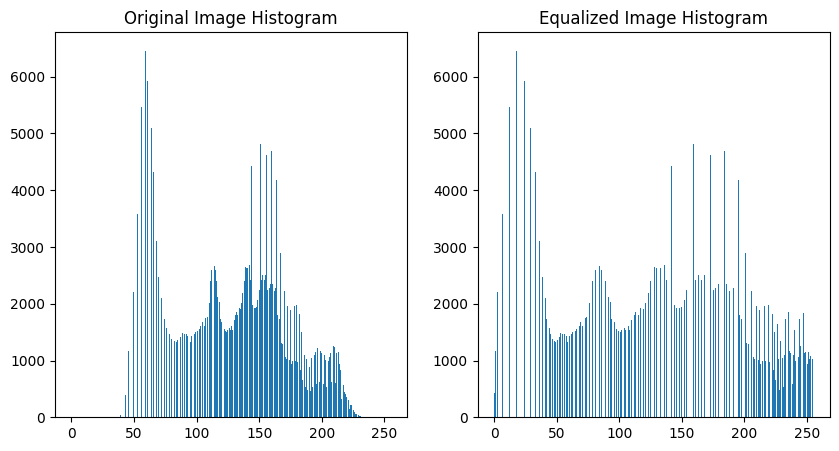

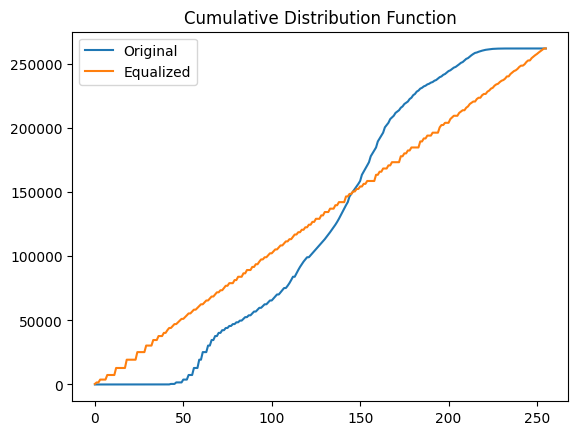

In [7]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(range(256), histogram)
plt.title('Original Image Histogram')

plt.subplot(1,2,2)
plt.bar(range(256),equalized_histogram)
plt.title('Equalized Image Histogram')

plt.show()

plt.plot(np.cumsum(histogram), label="Original")
plt.plot(np.cumsum(equalized_histogram), label="Equalized")
plt.legend()
plt.title("Cumulative Distribution Function")
plt.show()
